   Order ID     Product  Quantity Ordered  Price Each  Order Date  \
0     39664  Headphones                 4       100.0  2024-06-22   
1     50615     Speaker                 3       150.0  2024-04-29   
2     61917      Camera                 5       600.0  2024-10-25   
3     90876      Camera                 1       600.0  2024-01-30   
4     39703      Tablet                 5       400.0  2024-10-08   

             Purchase Address  
0  398 Main St, San Francisco  
1        846 Main St, Chicago  
2    708 Main St, Los Angeles  
3        313 Main St, Seattle  
4        957 Main St, Phoenix  


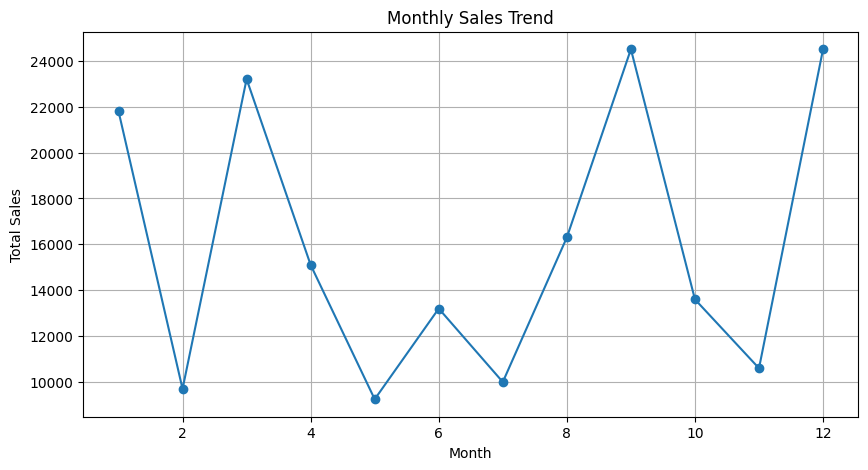

가장 많이 팔린 제품:
Product
Monitor       60
Headphones    59
Camera        56
Tablet        54
Laptop        48
Smartwatch    48
Speaker       47
Smartphone    45
Name: Quantity Ordered, dtype: int64
<class 'pandas.core.series.Series'>
Index: 136 entries, 183 Main St, San Diego to 442 Main St, New York
Series name: Sales
Non-Null Count  Dtype  
--------------  -----  
136 non-null    float64
dtypes: float64(1)
memory usage: 2.1+ KB
가장 높은 매출을 기록한 고객 주소:
Purchase Address
183 Main St, San Diego      6000.0
308 Main St, Seattle        6000.0
595 Main St, Phoenix        4800.0
261 Main St, Chicago        4800.0
361 Main St, Los Angeles    4800.0
298 Main St, New York       4800.0
270 Main St, Seattle        4000.0
236 Main St, Houston        4000.0
215 Main St, Phoenix        4000.0
208 Main St, San Diego      3600.0
Name: Sales, dtype: float64


In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('data/ecommerce_sales_data.csv')

# 데이터 살펴보기
print(df.head())

# 데이터 전처리 (결측값 제거 및 형 변환)
df.dropna(inplace=True) # na 값 삭제 및 적용
df['Order Date'] = pd.to_datetime(df['Order Date']) # 데이터 타입 변환?
df['Month'] = df['Order Date'].dt.month # 새로운 컬럼생성 및 값 입력
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] # 전체 가격= 수량 * 개당가격

# 월별 매출 분석
monthly_sales = df.groupby('Month')['Sales'].sum()
# Month로 그룹화, 그 다음 Sales 컬럼을 선택, 합을 계산
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid()
plt.show()

# 가장 많이 팔린 제품 찾기
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
# Product로 그룹화, Quantity Ordered 컬럼 선택, 합산, 정렬, 내림차순
print("가장 많이 팔린 제품:")
print(top_products.head(10))

# 고객별 구매 패턴 분석
customer_sales = df.groupby('Purchase Address')['Sales'].sum().sort_values(ascending=False)
# Purchase Address로 그룹화, Sales 컬럼 선택, 합산, 정렬, 내림차순
customer_sales.info()
print("가장 높은 매출을 기록한 고객 주소:")
print(customer_sales.head(10))

